In [1]:
import numpy as np
import numba

from deduce_asymptotics import Deducer

In [2]:
def check_array_sorted(arr):
    for left, right in zip(arr[:-1], arr[1:]):
        if left > right:
            return False
    return True

def check_function_sorts(sort_func, num_tries=1_00, n=1000):
    for i in range(num_tries):
        arr = np.random.randint(0, 100, n)
        arr  = sort_func(arr)
        if not check_array_sorted(arr):
            return False
    return True

In [3]:
# @numba.njit
def selection_sort(arr_):
    arr = arr_.copy()
    n = len(arr)
    for i in range(n-1):
        # Find the minimum element in the unsorted part
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        # Swap the found minimum element with the first element of the unsorted part
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr


In [8]:
np.random.randint(0, 20, 8)

array([ 8,  0,  4,  6, 13,  9, 15,  1])

In [5]:
n = 10
data = np.random.randint(0, 2, n)
print(data)

data = selection_sort(data)
print(data)

[1 0 1 0 0 1 0 0 1 1]
[0 0 0 0 0 1 1 1 1 1]


In [7]:
check_function_sorts(selection_sort, 100, 100)

True

O(1)            =   0.0144                                            :  0.1% confidence;	loss=0.0009816
O(log n)        =   0.004708 * log(x) + 0                             :  0.1% confidence;	loss=0.0007484
O(n)            =   0.0001007 * x + 3.97e-06                          :  0.8% confidence;	loss=0.0001219
O(n log n)      =   1.574e-05 * x * log(x) + 3.866e-06                :  1.3% confidence;	loss=7.502e-05
O(n^2)          =   1.341e-07 * x^2 + 0.0002938                       :  68.0% confidence;	loss=1.38e-06
O(n^2 log n)    =   1.962e-08 * x^2 * log(x) + 0.0009326              :  24.1% confidence;	loss=3.891e-06
O(n^3)          =   1.392e-10 * x^3 + 0.003516                        :  2.0% confidence;	loss=4.581e-05
O(n^3 log n)    =   2.019e-11 * x^3 * log(x) + 0.003989               :  1.7% confidence;	loss=5.588e-05
O(e^n)          =   0.005377 * exp(0.003236 * x) + 0                  :  1.9% confidence;	loss=4.997e-05


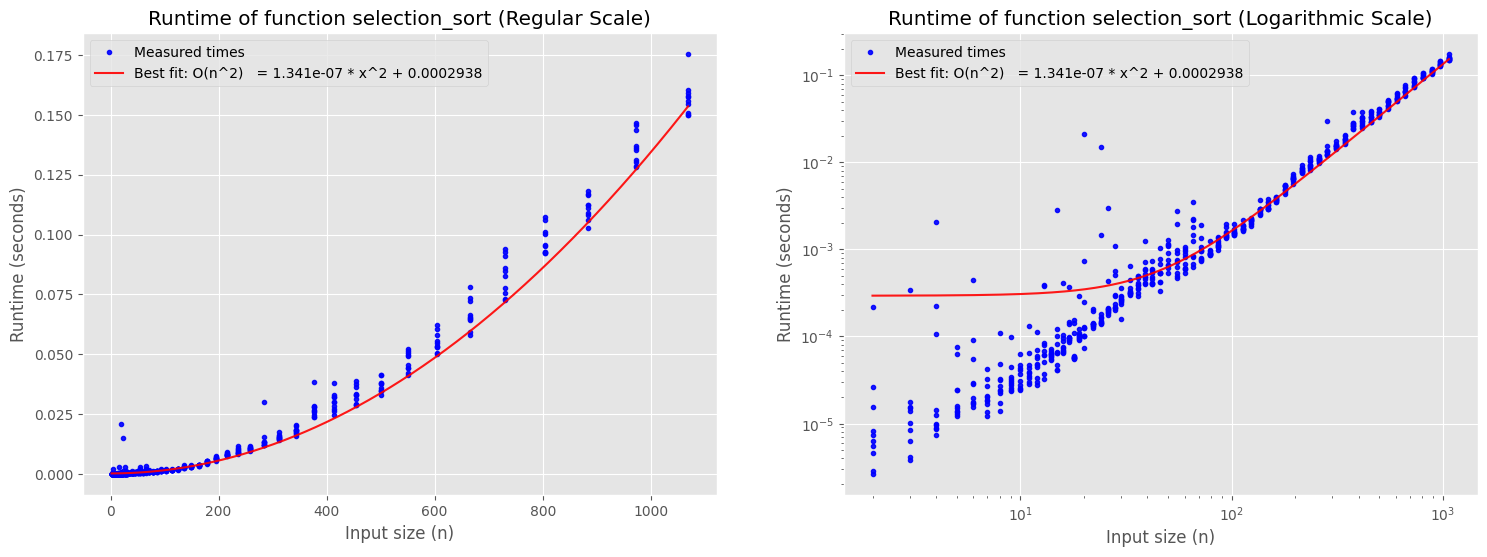

In [5]:
ded = Deducer(selection_sort, lambda n: np.random.uniform(0, 1, n))
ded.deduce()
ded.report()
ded.plot()

In [ ]:
ded.best_solver(10**6)